## An Application with APRIORI on real data

In [1]:
# setup
# this script is assuming that the apyori.py and pyfim.py scripts (along with the data) are uploaded
import pandas as pd
import numpy as np
from apyori import apriori
from fim import eclat
import matplotlib.pyplot as plt

In [2]:
order_data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/main/Data%20Sets/order_products_train.csv?raw=true')
product_data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/main/Data%20Sets/products.csv')

In [3]:
order_data

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [5]:
product_data.loc[product_data.product_id==49302]

,product_id,product_name,aisle_id,department_id
49301,49302,Bulgarian Yogurt,120,16


In [8]:
# here we merged the two data sets for connecting the barcode with the name of the actual product
# we save the result into a new data frame called named_orders
named_orders = pd.merge(order_data,product_data,on='product_id')
named_orders.sort_values('product_id')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
831805,2050666,1,6,0,Chocolate Sandwich Cookies,61,19
667706,1641609,1,1,1,Chocolate Sandwich Cookies,61,19
1298643,3207223,1,28,0,Chocolate Sandwich Cookies,61,19
749575,1845054,1,11,0,Chocolate Sandwich Cookies,61,19
1091916,2698866,1,1,0,Chocolate Sandwich Cookies,61,19
...,...,...,...,...,...,...,...
446055,1092104,49687,1,0,Smartblend Healthy Metabolism Dry Cat Food,41,8
1014644,2508423,49688,3,0,Fresh Foaming Cleanser,73,11
891142,2198380,49688,10,0,Fresh Foaming Cleanser,73,11
269349,655800,49688,10,1,Fresh Foaming Cleanser,73,11


In [9]:
# get the count for the different products purchased
counts = named_orders['product_name'].value_counts()
# we want items transacted at least 500 times
counts.head(370)

product_name
Banana                            18726
Bag of Organic Bananas            15480
Organic Strawberries              10894
Organic Baby Spinach               9784
Large Lemon                        8135
                                  ...  
Uncured Slow Cooked Ham             508
Organic Chicken Stock               508
Strawberry Rhubarb Yoghurt          507
Blueberry Yoghurt                   506
Cran Raspberry Sparkling Water      503
Name: count, Length: 370, dtype: int64

In [10]:
# here we create a hard threshold for the frequency of products being transacted
v = 200

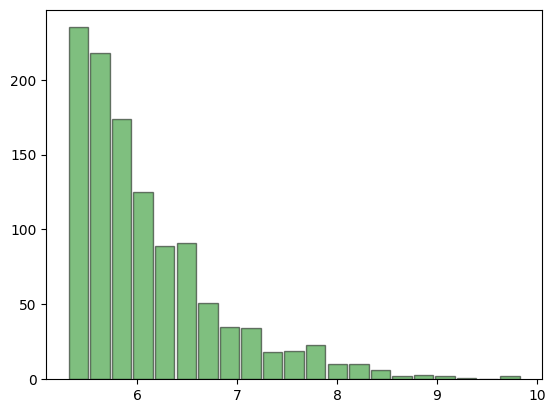

In [11]:
# we can visualize this the frequency distribution as a histogram and retain a list with the most frequently purchased
counts = counts[counts > v] # this is the thresholding part
plt.hist(np.log(counts.values), bins=21,color='green',edgecolor='k',rwidth=0.9,alpha=0.5)
plt.show()

In [12]:
counts

product_name
Banana                                18726
Bag of Organic Bananas                15480
Organic Strawberries                  10894
Organic Baby Spinach                   9784
Large Lemon                            8135
                                      ...  
Crunchy Oats N' Honey Granola Bars      202
Heavy Cream                             202
Organic Large Grade A Eggs              201
Diet Dr.Pepper Soda Pack                201
Large Grade AA Organic Eggs             201
Name: count, Length: 1148, dtype: int64

In [13]:
# we want to subset the big list of transactions
# IMPORTANT
# here we subset the "selected" orders
selected_orders = named_orders[named_orders['product_name'].isin(counts.index.values.tolist())]
selected_orders

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16
...,...,...,...,...,...,...,...
1384610,3421063,49235,1,1,Organic Half & Half,53,16
1384612,3421063,14233,3,1,Natural Artesian Water,115,7
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13


In [14]:
# we now need the list of transactions and the items appearing in those transactions
# so, we need to pivot the data frame on TID ("order_id")
# here we pivot the data frame to see the products transacted in each purchase order
pd.options.mode.chained_assignment = None
selected_orders['cols'] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index = 'order_id',columns = 'cols')[['product_name']]

In [15]:
selected_pivot

product_name  \
cols                                              0    
order_id                                               
1                              Organic Celery Hearts   
36                                      Spring Water   
38        Organic Raw Unfiltered Apple Cider Vinegar   
96                                    Roasted Turkey   
98                              Natural Spring Water   
...                                              ...   
3421049    Organic Whole Grain Wheat English Muffins   
3421056            Total Plain Greek Strained Yogurt   
3421058                               Sweet Potatoes   
3421063                          Organic Half & Half   
3421070              Organic Unsweetened Almond Milk   

                                                                          \
cols                                 1                                2    
order_id                                                                   
1                        Cucumber Kirby           Bag of Organic Bananas   
36                  Organic Half & Half               Super Greens Salad   
38                 Organic Baby Arugula         Organic Hot House Tomato   
96                     Organic Cucumber           Organic Grape Tomatoes   
98               Bag of Organic Bananas  Organic Unsweetened Almond Milk   
...                                 ...                              ...   
3421049           Organic Baby Kale Mix            Organic Baby Broccoli   
3421056           Sparkling Lemon Water                              NaN   
3421058   White Giant Paper Towel Rolls                              NaN   
3421063          Natural Artesian Water                              NaN   
3421070            Creamy Peanut Butter               Broccoli Florettes   

                                                                          \
cols                                     3                            4    
order_id                                                                   
1                      Organic Hass Avocado  Organic Whole String Cheese   
36        Organic Garnet Sweet Potato (Yam)                    Asparagus   
38                               Green Peas             Bunched Cilantro   
96                      Organic Raspberries   Organic Whole Strawberries   
98                      Organic Raspberries                    Guacamole   
...                                     ...                          ...   
3421049                                 NaN                          NaN   
3421056                                 NaN                          NaN   
3421058                                 NaN                          NaN   
3421063                                 NaN                          NaN   
3421070                                 NaN                          NaN   

                                                             \
cols                       5                             6    
order_id                                                      
1                         NaN                           NaN   
36                        NaN                           NaN   
38        Flat Parsley, Bunch                           NaN   
96        Organic Blueberries                           NaN   
98                Black Beans  Organic Whole Grassmilk Milk   
...                       ...                           ...   
3421049                   NaN                           NaN   
3421056                   NaN                           NaN   
3421058                   NaN                           NaN   
3421063                   NaN                           NaN   
3421070                   NaN                           NaN   

                                                                      \
cols                                  7                           8    
order_id                                                               
1                         

In [16]:
# now we can get the list of the purchased items for each transaction
purchases = []
for i in range(0,len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,len(selected_pivot.columns))])

In [17]:
# we want to clean the names so 'nan' does no longer appear
# we want a clean list of transactions that is without any "nan" items
cleanList = []
for purchase in purchases:
  cleanList.append([x for x in purchase if str(x) != 'nan'])

In [18]:
cleanList[0]

['Organic Celery Hearts',
 'Cucumber Kirby',
 'Bag of Organic Bananas',
 'Organic Hass Avocado',
 'Organic Whole String Cheese']

In [23]:
# we are providing the clean list to the "apriori" algorithm
rules = apriori(cleanList, min_support = 0.01, min_confidence = 0.01, min_lift=1.5,max_length=2)

In [24]:
l = list(rules)

In [25]:
# let's unpack and print the rules in a humane way
l

[RelationRecord(items=frozenset({'Organic Baby Spinach', 'Bag of Organic Bananas'}), support=0.018431660250756307, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bag of Organic Bananas'}), items_add=frozenset({'Organic Baby Spinach'}), confidence=0.14444444444444443, lift=1.7909841464522573), OrderedStatistic(items_base=frozenset({'Organic Baby Spinach'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.22853638593622239, lift=1.7909841464522573)]),
 RelationRecord(items=frozenset({'Organic Cucumber', 'Bag of Organic Bananas'}), support=0.010452301072432469, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Bag of Organic Bananas'}), items_add=frozenset({'Organic Cucumber'}), confidence=0.08191214470284237, lift=2.1541313701140075), OrderedStatistic(items_base=frozenset({'Organic Cucumber'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.2748753522653371, lift=2.1541313701140075)]),
 RelationRecord(items=frozenset({'Organic Hass Avoc

In [26]:
rules = 0
for result in l:
  supp   = int(result.support*10000)/100
  if result.ordered_statistics[0].confidence > result.ordered_statistics[1].confidence:
    i = 0
  else:
    i = 1
  conf   = int(result.ordered_statistics[i].confidence*100)
  hypo   = ''.join([x+' ' for x in result.ordered_statistics[i].items_base])
  conc   = ''.join([x+' ' for x in result.ordered_statistics[i].items_add])
  rules = rules + 1
  print("If "+str(hypo)+" is purchased, " +str(conf)+" % of the time " + str(conc)+" is purchased [support - " +
        str(supp)+"%]"+'  Lift: '+str(round(result.ordered_statistics[i].lift,2)))
print("Total rules built : " +str(rules))

If Organic Baby Spinach  is purchased, 22 % of the time Bag of Organic Bananas  is purchased [support - 1.84%]  Lift: 1.79
If Organic Cucumber  is purchased, 27 % of the time Bag of Organic Bananas  is purchased [support - 1.04%]  Lift: 2.15
If Organic Hass Avocado  is purchased, 33 % of the time Bag of Organic Bananas  is purchased [support - 1.99%]  Lift: 2.6
If Organic Raspberries  is purchased, 32 % of the time Bag of Organic Bananas  is purchased [support - 1.46%]  Lift: 2.52
If Organic Strawberries  is purchased, 28 % of the time Bag of Organic Bananas  is purchased [support - 2.53%]  Lift: 2.21
If Honeycrisp Apple  is purchased, 34 % of the time Banana  is purchased [support - 1.01%]  Lift: 2.25
If Large Lemon  is purchased, 26 % of the time Banana  is purchased [support - 1.77%]  Lift: 1.72
If Organic Avocado  is purchased, 29 % of the time Banana  is purchased [support - 1.82%]  Lift: 1.94
If Strawberries  is purchased, 29 % of the time Banana  is purchased [support - 1.6%]  L

In [27]:
nr = 0
confidence = []
lift = []
for item in l:
    pair = item[0]
    # We cannot seem to tell apriori to ignore NaN items, so we will refrain from printing results containing them
    # they will be returned as lower-case text "nan".
    if "nan" not in pair:
        if item[2][0][2] > item[2][1][2]:
          items = [x for x in pair]
          print("Rule: " + items[0] + " => " + items[1])

          #second index of the inner list
          print("Support: " + str(round(item[1]*100,2)) + "%")

          #third index of the list located at 0th
          #of the third index of the inner list
          confidence.append(round( item[2][0][2]*100,2))
          print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
          lift.append(round( item[2][0][2]*100,2))
          print("Lift: " + str( round(item[2][0][3],2) ))
          nr += 1
        else:
          items = [x for x in pair]
          print("Rule: " + items[1] + " => " + items[0])

          #second index of the inner list
          print("Support: " + str(round(item[1]*100,2)) + "%")

          #third index of the list located at 0th
          #of the third index of the inner list
          confidence.append(round( item[2][1][2]*100,2))
          print("Confidence: " + str(round( item[2][1][2]*100,2)) + "%")
          lift.append(round( item[2][1][2]*100,2))
          print("Lift: " + str( round(item[2][1][3],2) ))
          nr += 1

Rule: Bag of Organic Bananas => Organic Baby Spinach
Support: 1.84%
Confidence: 22.85%
Lift: 1.79
Rule: Bag of Organic Bananas => Organic Cucumber
Support: 1.05%
Confidence: 27.49%
Lift: 2.15
Rule: Bag of Organic Bananas => Organic Hass Avocado
Support: 1.99%
Confidence: 33.18%
Lift: 2.6
Rule: Bag of Organic Bananas => Organic Raspberries
Support: 1.47%
Confidence: 32.1%
Lift: 2.52
Rule: Bag of Organic Bananas => Organic Strawberries
Support: 2.53%
Confidence: 28.22%
Lift: 2.21
Rule: Banana => Honeycrisp Apple
Support: 1.01%
Confidence: 34.67%
Lift: 2.25
Rule: Banana => Large Lemon
Support: 1.78%
Confidence: 26.53%
Lift: 1.72
Rule: Banana => Organic Avocado
Support: 1.83%
Confidence: 29.91%
Lift: 1.94
Rule: Banana => Strawberries
Support: 1.61%
Confidence: 30.0%
Lift: 1.94
Rule: Limes => Large Lemon
Support: 1.31%
Confidence: 26.44%
Lift: 3.94
Rule: Organic Avocado => Large Lemon
Support: 1.11%
Confidence: 18.21%
Lift: 2.72
Rule: Organic Baby Spinach => Large Lemon
Support: 1.02%
Confi

### Application with ECLAT

In [45]:
rule_count = 0
rules = eclat(cleanList, supp=1, zmin=2)
for i in range(0,len(rules)):
    supp = round(int(rules[i][1])/len(purchases)*100,3)
    items = rules[i][0]
    if "nan" not in items:
        rule_count = rule_count +1
        item_1 = rules[i][0][0]
        item_2 = rules[i][0][1]
        print("If "+str(item_1)+" is purchased, "+str(supp)+"% of the time " + str(item_2)+" is purchased [absolute support=" +str(rules[i][1])+"]")
print("Total rules built : " +str(rule_count))

If Organic Strawberries is purchased, 1.967% of the time Banana is purchased [absolute support=2174]
If Organic Strawberries is purchased, 2.782% of the time Bag of Organic Bananas is purchased [absolute support=3074]
If Organic Baby Spinach is purchased, 1.81% of the time Banana is purchased [absolute support=2000]
If Organic Baby Spinach is purchased, 2.023% of the time Bag of Organic Bananas is purchased [absolute support=2236]
If Organic Baby Spinach is purchased, 1.483% of the time Organic Strawberries is purchased [absolute support=1639]
If Large Lemon is purchased, 1.953% of the time Banana is purchased [absolute support=2158]
If Large Lemon is purchased, 1.12% of the time Organic Baby Spinach is purchased [absolute support=1238]
If Organic Avocado is purchased, 2.005% of the time Banana is purchased [absolute support=2216]
If Organic Avocado is purchased, 1.269% of the time Organic Baby Spinach is purchased [absolute support=1402]
If Organic Avocado is purchased, 1.221% of the 

## Examples with Gradient Descent

In [46]:
# include a setup for plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
# import a real data to demonstrate gradient descent
data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/main/Data%20Sets/Advertising.csv?raw=true')

In [52]:
# here the goal is to predict the Sales (cont. variable) by using values from TV, Radio and Newspaper advertising
x = data.loc[:,['TV','Radio','Newspaper']].values
y = data['Sales'].values

In [54]:
# first we want to center the data, and then we want to find the optimal weights for a linear model, i.e. minimize the sum of squared errors
# we may need a scaler
def zscore(x):
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [55]:
xscaled = zscore(x)
ycentered = y-np.mean(y)

In [58]:
# we look for the optimal weights w1, w2 and w3 such that the predictions made with the corresponding linear combination of the columns is minimizing SSE
# define the loss function
def L(w):
    prediction = xscaled@w
    errors = y - prediction
    return sum((errors**2))/len(errors)

In [59]:
L([1,2,3])
# we need better weights so we must compute the gradient of L

np.float64(215.2580894614986)

In [65]:
def gradient(w):
    prediction = xscaled@w
    errors = y - prediction
    return -1/len(errors)*errors@xscaled

In [66]:
gradient([1,2,3])

array([-2.79144517,  0.11822912,  2.5766967 ])

In [71]:
w_new = w - 0.1 *gradient(w)

In [72]:
# this shows that at the updated weights (w_new) the loss function value has decreased.
L(w_new)

np.float64(212.50708921790113)